# A meta-analysis of the mechanical properties of ice-templated ceramics and metals

Welcome to the notebook accompanying this paper: "A meta-analysis of the mechanical properties of ice-templated ceramics and metals", published in *Science and Technology of Advanced Materials* (link coming as soon as the paper is available online).

Follow through the notebook to generate the plots published in the paper. You need to have *Matplotlib*, *Numpy*, and *Pandas* installed. If you are not familiar with the IPython notebook format, start here: <http://ipython.org/index.html>

Your files and directories should be organized as follow, in your working directory:

* *code*: contains this IPython notebook
* *figures*: where all figures will be saved
* *data*: where the CSV files should be. There are two sets of data: 
    * The data compiled from the literature review on ice templating (*icetemplating.csv*). 
    * The data corresponding to the properties of cellular ceramics (*studart.csv*), and compiled in this paper: Studart, A. R., Gonzenbach, U. T., Tervoort, E., & Gauckler, L. J. (2006). Processing Routes to Macroporous Ceramics: A Review. Journal of the American Ceramic Society, 89(6), 1771–1789. doi:10.1111/j.1551-2916.2006.01044.x The paper can be found here <http://www.blackwell-synergy.com/doi/abs/10.1111/j.1551-2916.2006.01044.x> (paywall)

    You can download these sets of data from Figshare here: <http://dx.doi.org/10.6084/m9.figshare.1412626>

-May, 2015. Sylvain Deville, Sylvain Meille, Jordi Seuba

Email to <sylvaindeville@gmail.com> or tweet to <http://twitter.com/DevilleSy> if you have any questions or comments, or just want to say hi!

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linspace
from matplotlib import rc #for latex use on the plots
from matplotlib.ticker import MultipleLocator, FormatStrFormatter # for labels formattings
%matplotlib inline

In [122]:
perso_linewidth = 0.3
# This will change your default rcParams
def init_plotting():
    plt.rcParams['figure.figsize'] = (3,3)
    plt.rcParams['font.size'] = 8
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['axes.linewidth'] = perso_linewidth
    plt.rcParams['savefig.dpi'] = '300'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = '0'
    plt.rcParams['axes.grid'] = False
    plt.rcParams['grid.color']='white'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = '0.1'
    plt.rcParams['axes.axisbelow'] = True
    plt.rcParams['lines.markersize']= 2.3 
    plt.rcParams['lines.markeredgewidth']= '0.1'
    plt.rcParams['lines.color']= 'r' 
    plt.rcParams['lines.marker']= 'o' 
    plt.rcParams['lines.linestyle']= '' 
    plt.rcParams['xtick.color']= '0'
    plt.rcParams['ytick.color']= '0'
    plt.rcParams['axes.color_cycle']= ['#3778bf', '#feb308', '#a8a495', '#7bb274', '#825f87']
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['right'].set_visible('False')
    plt.gca().spines['top'].set_visible('False')
    plt.gca().spines['top'].set_color('none')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    plt.rcParams['ytick.minor.size']= 1.5
    plt.rcParams['ytick.major.width']= perso_linewidth
    plt.rcParams['ytick.minor.width']= perso_linewidth
    plt.rcParams['xtick.major.width']= perso_linewidth
    plt.rcParams['xtick.minor.width']= perso_linewidth

init_plotting()

plt.close() # this line to avoid an empty plot showing up

In [123]:
# function to list the bib key of papers used in the plots
# The output is formatted to be used directly in Markdown. Pandoc can take care of the reference list from here.
def list_authors(data):
    authors = data.dropna()
    authors = authors.drop_duplicates()
    authors.tolist()
    print str(len(authors)) + " papers"
    print '@'+'; @'.join(authors)

In [124]:
# common formatting for the plots, not passed as rcParams
figuresize = 3
titlefontsize = 8
titleweight = 'bold'

rc('font', **{'family':'serif', 'serif':['Palatino']})
rc('text', usetex=True)

# Mechanical models used to predict the compressive strength

## Closed cells
$$\sigma=\sigma_{p}\left(C_6\left(\phi\frac{\rho^*}{\rho_s}\right)+C_{6}^{''}\left(1-\phi\right)\frac{\rho^*}{\rho_s}\right) \text{  (eq. 1)}$$ 
with $C_6=0.65$ and $C_6^"=1$, and where $\phi$ is the solid fraction in the edges, $\rho_s$ and $\rho^*$ the apparent density of the dense and cellular material respectively, and $\sigma_p$ the modulus of rupture of the solid cell wall material.

## Open cell, brittle crushing model
$$\sigma=\sigma_{p}C_4\left(\frac{\rho^*}{\rho_s}\right)^{3/2}\text{  (eq. 2)}$$ 
with $C_4=0.2$, and where $\sigma_{p}$ is the modulus of rupture of the solid cell wall material, and $\rho_s$ and $\rho^*$ the apparent density of the dense and cellular material respectively.

## Honeycomb, out of plane
$$\sigma=6 E_s \left(\frac{\rho^*}{\rho_s}\right)^3 \text{  (eq. 3)}$$
where $E_s$ the Young's modulus of the corresponding dense material, and $\rho_s$ and $\rho^*$ the apparent density of the dense and cellular material respectively.

In [125]:
# Parameters of the Ashby model
phi_edges = 0
C2 = 0.2
C6 = 0.65
C6s = 1

# data for the upper bound value of compressive strength vs porosity
relative_density_table = linspace(0.0, 1.0, num=1000)
relative_porosity = [(1-i)*100 for i in relative_density_table]

# open cells model:
brit_crush_str = [C2*i**(1.5) for i in relative_density_table]

# closed cells models:
closedcell_str = [C6*phi_edges*i +C6s*(1-phi_edges)*i for i in relative_density_table]

# functions used to plot the prediction of the models on the plots
def plot_upper_limit():
        plt.plot(relative_porosity, brit_crush_str, linestyle=':', linewidth='0.5', marker='', dashes=[2, 2], color='0.5', zorder=1, dash_capstyle='round')
        plt.plot(relative_porosity, closedcell_str, linestyle=':', linewidth='0.5', marker='', dashes=[2, 2], color='0.5', zorder=1, dash_capstyle='round')
        
def plot_upper_limit_log():
        plt.plot(relative_density_table, brit_crush_str, linestyle=':', linewidth='0.5', marker='', dashes=[2, 2], color='0.5', zorder=1, dash_capstyle='round')
        plt.plot(relative_density_table, closedcell_str, linestyle=':', linewidth='0.5', marker='', dashes=[2, 2], color='0.5', zorder=1, dash_capstyle='round')        

strength_table = linspace(0.1, 1000.0, num=10000)
        
def plot_upper_limit_honeycomb():
        plt.plot(strength_table, strength_table, linestyle='--', linewidth='0.5', marker='', dashes=[2, 2], color='0.5', zorder=1, dash_capstyle='round', markevery='2')    


# Load the data

In [126]:
data = pd.io.parsers.read_csv('../data/icetemplating.csv', sep=';', decimal=',')
foams = pd.io.parsers.read_csv('../data/studart.csv', sep=';', decimal=',')

# Create a few subsets of data

In [128]:
water = data[(data['Solvant'] == 'water') & (data['green body ?'] < 1)]
camphene = data[(data['Solvant'] == 'camphene')]
tba = data[(data['Solvant'] == 'TBA')]

cellular = data[(data['failure mode'] == 'cellular')]
brittle = data[(data['failure mode'] == 'brittle')]
failureunknown = data[(data['failure mode'] == '?')]

defects = data[(data['Defects'] == 'yes')]
nodefects = data[(data['Defects'] == 'no')]
notsureifdefects = data[(data['Defects'] == '?')]

withparticlesize = data[(data['Granulo poudre'] > 0)]

# Porosity vs. solid loading, for the three most commonly used solvents
Figure 3 of the paper

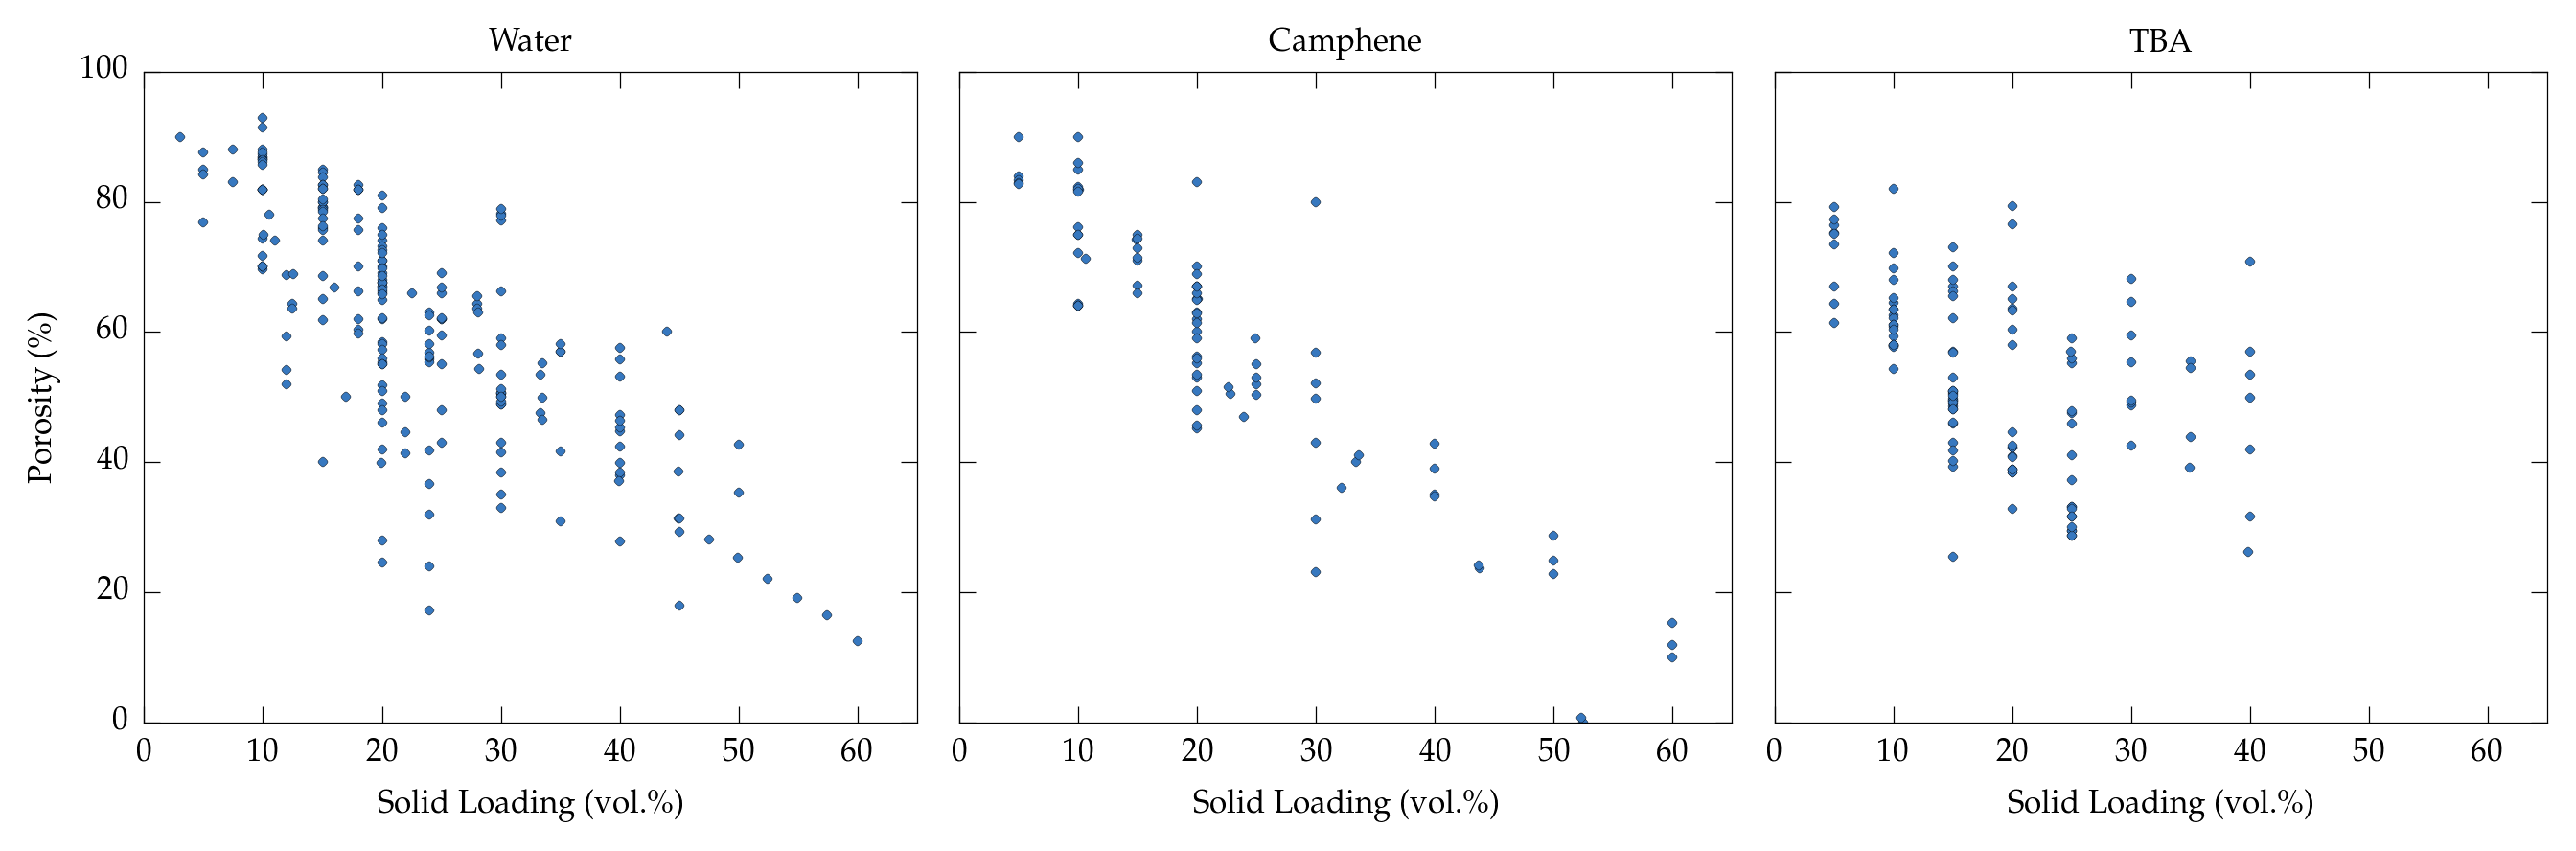

In [129]:
fig = plt.figure(figsize = (3*figuresize, figuresize))

ax = fig.add_subplot(1,3,1)
plt.plot(water['Solid Loading'], water['Porosity'])
ax.set_xlabel('Solid Loading (vol.\%)')
ax.set_ylabel('Porosity (\%)')
plt.title('Water', fontsize=titlefontsize, weight=titleweight)
plt.xlim(0,65)
plt.ylim(0,100)

ax = fig.add_subplot(1,3,2)
plt.plot(camphene['Solid Loading'], camphene['Porosity'])
ax.set_xlabel('Solid Loading (vol.\%)')
plt.xlim(0,65)
plt.ylim(0,100)
ax.set_yticklabels([])
plt.title('Camphene', fontsize=titlefontsize, weight=titleweight)

ax = fig.add_subplot(1,3,3)
plt.plot(tba['Solid Loading'], tba['Porosity'])
ax.set_xlabel('Solid Loading (vol.\%)')
plt.xlim(0,65)
plt.ylim(0,100)
ax.set_yticklabels([])
plt.title('TBA', fontsize=titlefontsize, weight=titleweight)

plt.tight_layout()
fig.savefig('../figures/figure3.png')

# Range of pore size achieved for the three most commonly used solvents
Figure 4 of the paper

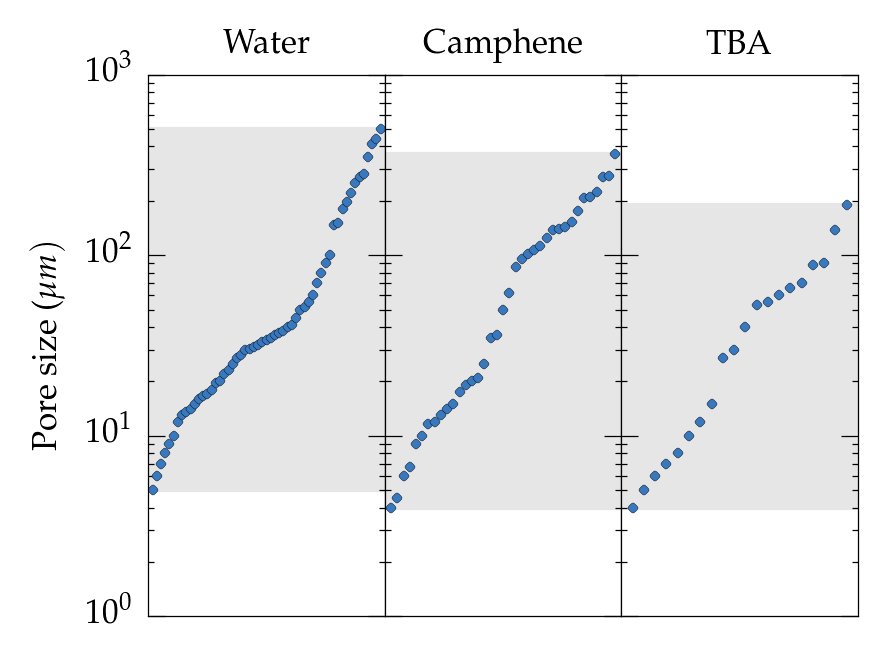

In [130]:
#extract the data with a pore value
water_porewidth = water[(water['Pore width'] > 0)]
camphene_porewidth = camphene[(camphene['Pore width'] > 0)]
tba_porewidth = tba[(tba['Pore width'] > 0)]

water_porewidth = water['Pore width'].tolist()
camphene_porewidth = camphene['Pore width'].tolist()
tba_porewidth = tba['Pore width'].tolist()

# remove duplicate values
water_porewidth = list(set(water_porewidth))
camphene_porewidth = list(set(camphene_porewidth))
tba_porewidth = list(set(tba_porewidth))

# remove NaN and sort list
water_porewidth = [x for x in water_porewidth if x>0]
water_porewidth.sort()

camphene_porewidth = [x for x in camphene_porewidth if x>0]
camphene_porewidth.sort()

tba_porewidth = [x for x in tba_porewidth if x>0]
tba_porewidth.sort()

# Figure 
fig = plt.figure(figsize=(figuresize, 0.75*figuresize))
ax1 = fig.add_subplot(131)
ax1.plot(water_porewidth)
ax1.set_yscale('log')
ax1.set_ylabel('Pore size (\mu m)')
rectangle = plt.Rectangle((-1, min(water_porewidth)), len(water_porewidth)+1, max(water_porewidth)-min(water_porewidth), color='0.9', zorder=0)
plt.gca().add_patch(rectangle)
plt.ylim(0,500)
plt.xlim(-1,len(water_porewidth))
plt.title('Water', fontsize=titlefontsize)
plt.gca().xaxis.set_major_locator(plt.NullLocator())

ax2 = fig.add_subplot(132, sharey=ax1)
ax2.plot(camphene_porewidth)
ax2.ticklabel_format(axis='both', visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
rectangle = plt.Rectangle((-1, min(camphene_porewidth)), len(camphene_porewidth)+1, max(camphene_porewidth)-min(camphene_porewidth), color='0.9', zorder=0)
plt.gca().add_patch(rectangle)
plt.ylim(0,500)
plt.xlim(-1,len(camphene_porewidth))
plt.title('Camphene', fontsize=titlefontsize)
plt.gca().xaxis.set_major_locator(plt.NullLocator())

ax3 = fig.add_subplot(133, sharey=ax1)
ax3.plot(tba_porewidth)
ax3.ticklabel_format(visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
rectangle = plt.Rectangle((-1, min(tba_porewidth)), len(tba_porewidth)+1, max(tba_porewidth)-min(tba_porewidth), color='0.9', zorder=0)
plt.gca().add_patch(rectangle)
plt.ylim(1,1000)
plt.xlim(-1,len(tba_porewidth))
plt.title('TBA', fontsize=titlefontsize)
plt.tight_layout()
fig.subplots_adjust(wspace=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())

fig.savefig('../figures/figure4.png')

# Pore size vs. total porosity content, all solvents
Figure 5 of the paper

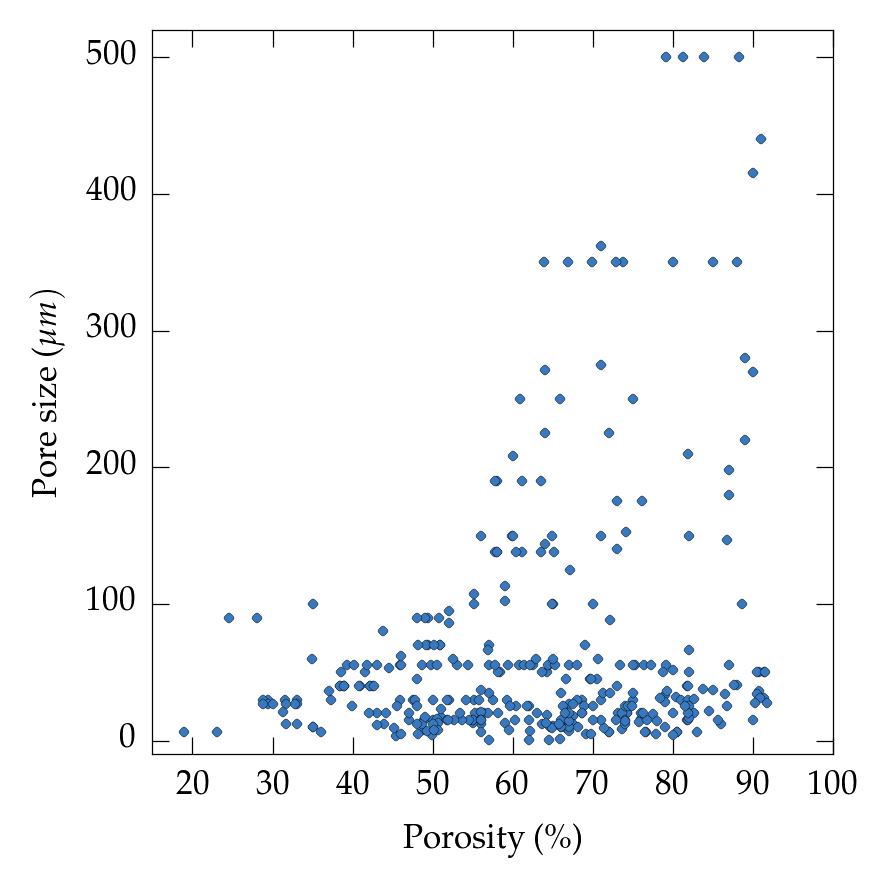

In [131]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(data['Porosity'], data['Pore width'])
ax.set_ylabel('Pore size (\mu m)')
ax.set_xlabel('Porosity (\%)')
#ax.set_yscale('log')
plt.ylim(-10, 520)
plt.xlim(15, 100)
plt.tight_layout()
fig.savefig('../figures/figure5.png')

# Overview of the compressive strength achieved
Figure 6 of the paper

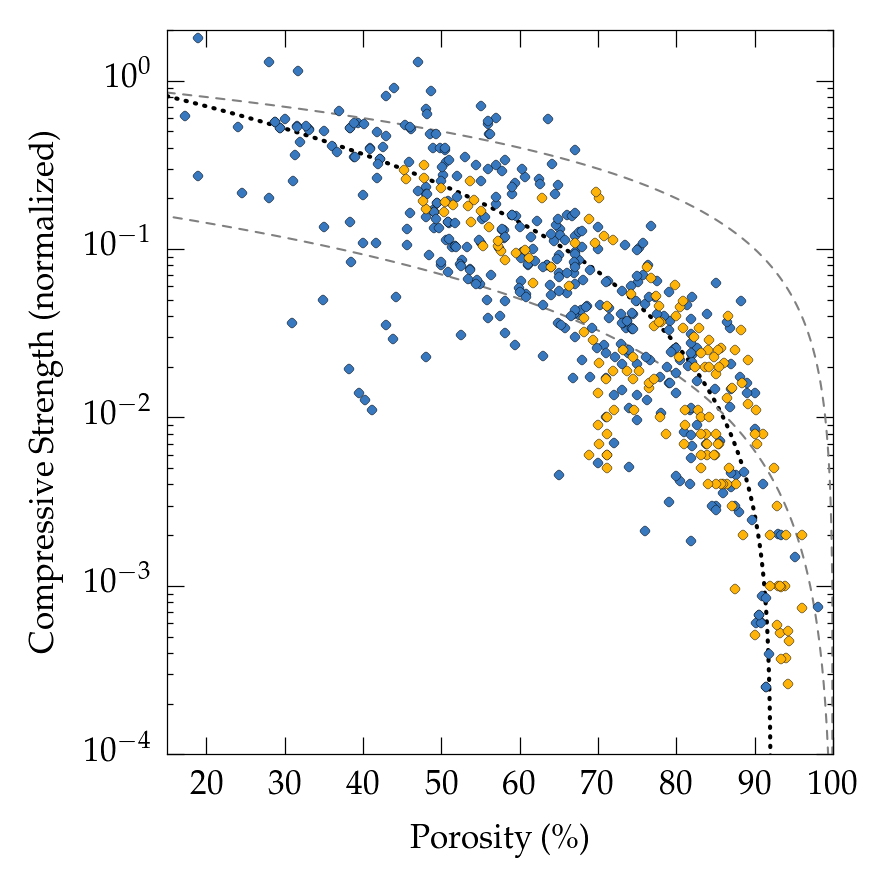

In [157]:
from scipy.optimize import curve_fit

# function used to fit the regression. Strength is assumed to vary with the power law of the relative density
def func (x, a, b, c):
    return a*(1-x/100)**b+c

fig = plt.figure()

# fit the data with a regression analysis
data_bis = data[(data['Porosity'] > 0) & (data['Normalized strength (compression)'] > 0)]
fitParamsIT, fitCovIT = curve_fit(func, data_bis['Porosity'], data_bis['Normalized strength (compression)'])
porosity_table = linspace(0, 100.0, num=10000)

ax = fig.add_subplot(1,1,1)
plt.plot(data['Porosity'], data['Normalized strength (compression)'])
plt.plot(foams['porosity'], foams['norm strength'])
plt.plot(porosity_table, func(porosity_table, fitParamsIT[0], fitParamsIT[1], fitParamsIT[2]), marker='', linestyle=':', color='k', dashes=[0.3, 2], zorder=1, dash_capstyle='round')
plot_upper_limit() # plot the open and close-cell model predictions
ax.set_yscale('log')
ax.set_xlabel('Porosity (\%)')
ax.set_ylabel('Compressive Strength (normalized)')
xmin = 15
xmax = 100
ymin = 0.0001
ymax = 2
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)

plt.tight_layout()
fig.savefig('../figures/figure6.png')

In [154]:
# parameters of the fit
print 'Exponent of the power law: '+str(fitParamsIT[1])

Exponent of the power law: 2.26321007527


In [155]:
# Extract the bibliographic references used for the plot
authors = data['Mendeley key']
list_authors(authors)

125 papers
@Shen2014a; @Yang2014; @Vijayan2014b; @Xing2014; @Lee2010b; @Flauder2014; @Souza2014a; @Kumar2014a; @Sadeghpour2014; @Hu2014a; @Tang2014a; @CHENG2014a; @Zeng2014a; @Xu2014; @Kim2014; @Kim2014b; @Dong2013; @Ai; @Farhangdoust2012a; @Naglieri2013; @MohammadHosseinGhzanfari2013; @Li2013a; @Sofie2004; @Liu2013a; @Xing2013; @Landi2013; @Zhang2013a; @Choi2012b; @Hunger2013; @Zamanian2012; @Flauder2012; @Zhang2012d; @Hunger2012; @Li2012f; @Hamamoto2012; @Farhangdoust2012; @Li2012d; @Xu2012a; @Hou2012; @Jung2013; @Hou2012a; @Du2012a; @Zhang2011a; @Zhang2012b; @Yook2012; @Choi2012; @Zhang2012a; @Liu; @Guo2010c; @Yao2011a; @Xia2012; @Li2011d; @Kim2011a; @Yue2011; @Han; @Mongkolkachit2010; @Guo2010b; @Guo2010; @Ye2010; @Liu2010; @Zhao2010; @Ye2010a; @Ye2010b; @Nakata2007; @Ding2007; @Landi2008; @Fife2009; @Jung2009; @Chino2008; @Fu2008a; @Fu2008; @Fu2007; @Chen2007a; @Deville2006; @Deng2007; @Cao2009; @Bettge; @Araki2005; @Araki2004a; @Araki2004; @Zuo2008; @Zhang2010; @Yoon2008a; @Yoon2

# Overview of the flexural strength achieved
Figure 7 of the paper

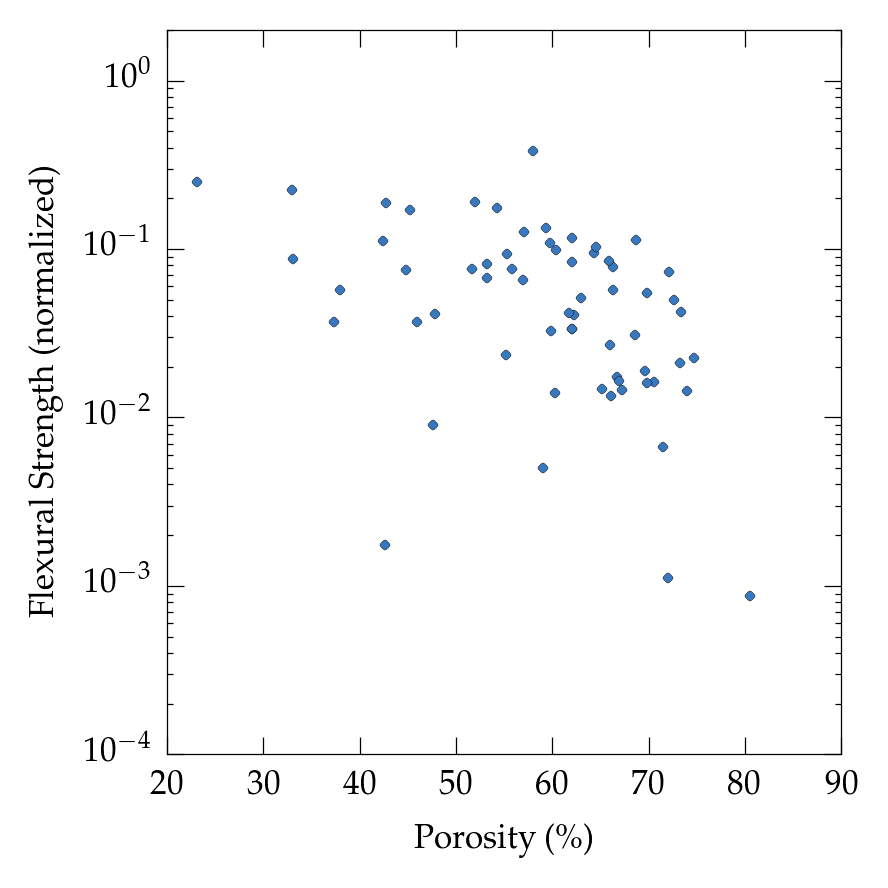

In [135]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(data['Porosity'], data['Normalized strength (flexion)'])
ax.set_yscale('log')
ax.set_xlabel('Porosity (\%)')
ax.set_ylabel('Flexural Strength (normalized)')
plt.ylim(0.0001, 2)
plt.xlim(20, 90)

plt.tight_layout()
fig.savefig('../figures/figure7.png')

In [136]:
# Extract the bib ref of the above plot
dataplot = data[(data['Normalized strength (flexion)'] > 0)]
authors = dataplot['Mendeley key']
list_authors(authors)

16 papers
@Shen2014a; @Yang2014; @Souza2014a; @Hu2014a; @Li2013a; @Hou2012a; @Zhang2012b; @Zhang2012a; @Yao2011a; @Xia2012; @Yue2011; @Ye2010; @Ye2010a; @Ye2010b; @Chen2007a; @Flauder2014a


# Compressive strength vs. pore size
Figure 8 of the paper

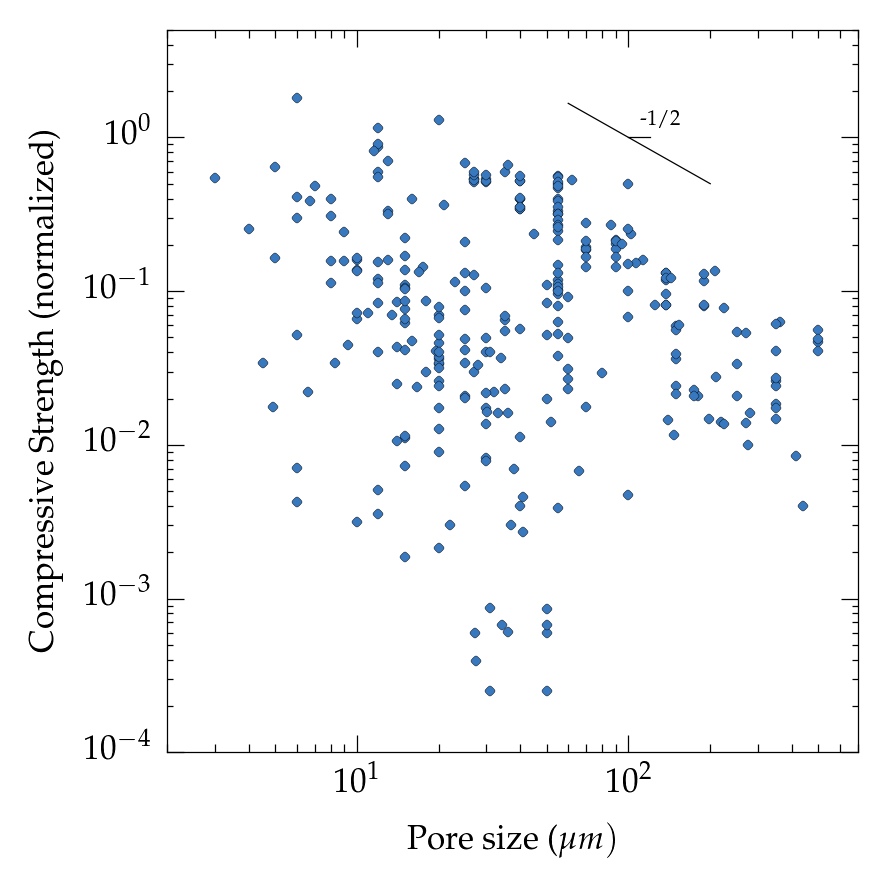

In [137]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(data['Pore width'], data['Normalized strength (compression)'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Pore size (\mu m)')
ax.set_ylabel('Compressive Strength (normalized)')
plt.ylim(0.0001, 5)
plt.xlim(2, 700)
plt.tight_layout()

# line with -1/2 slope
poresize_table = linspace(60, 200.0, num=10000)
plt.plot(poresize_table, 100*poresize_table**(-1/2), marker='', linestyle='-', color='black', linewidth='0.3')
plt.plot([100, 120], [1, 1], 'k-', lw=0.3)
plt.annotate('-1/2', (110, 1.2), fontsize='5')
            
fig.savefig('../figures/figure8.png')

In [138]:
# Extract the bib ref of the above plot
dataplot = data[(data['Pore width'] > 0)]
authors = dataplot['Mendeley key']
list_authors(authors)

69 papers
@Shen2014a; @Yang2014; @Vijayan2014b; @Lee2010b; @Flauder2014; @Souza2014a; @Kumar2014a; @Sadeghpour2014; @Hu2014a; @Tang2014a; @CHENG2014a; @Zeng2014a; @Xu2014; @Kim2014; @Kim2014b; @Dong2013; @Ai; @Farhangdoust2012a; @Naglieri2013; @MohammadHosseinGhzanfari2013; @Li2013a; @Liu2013a; @Landi2013; @Zhang2013a; @Choi2012b; @Hunger2013; @Flauder2012; @Zhang2012d; @Hunger2012; @Li2012f; @Hamamoto2012; @Farhangdoust2012; @Li2012d; @Hou2012; @Jung2013; @Hou2012a; @Du2012a; @Zhang2011a; @Choi2012; @Liu; @Li2011d; @Kim2011a; @Yue2011; @Liu2010; @Zhao2010; @Ding2007; @Landi2008; @Chino2008; @Fu2008a; @Fu2008; @Deville2006; @Cao2009; @Zuo2008; @Zhang2010; @Yoon2008a; @Yoon2007a; @Yoon2007b; @Yook2009; @Yook2009a; @Macchetta2009; @Liu2010a; @Hong2010a; @Hong2009; @Han2010a; @Fukushima2008; @Fukushima2010; @Fu2010; @Deville2006b; @Flauder2014a


# Compressive strength and failure modes
Figure 9 of the paper

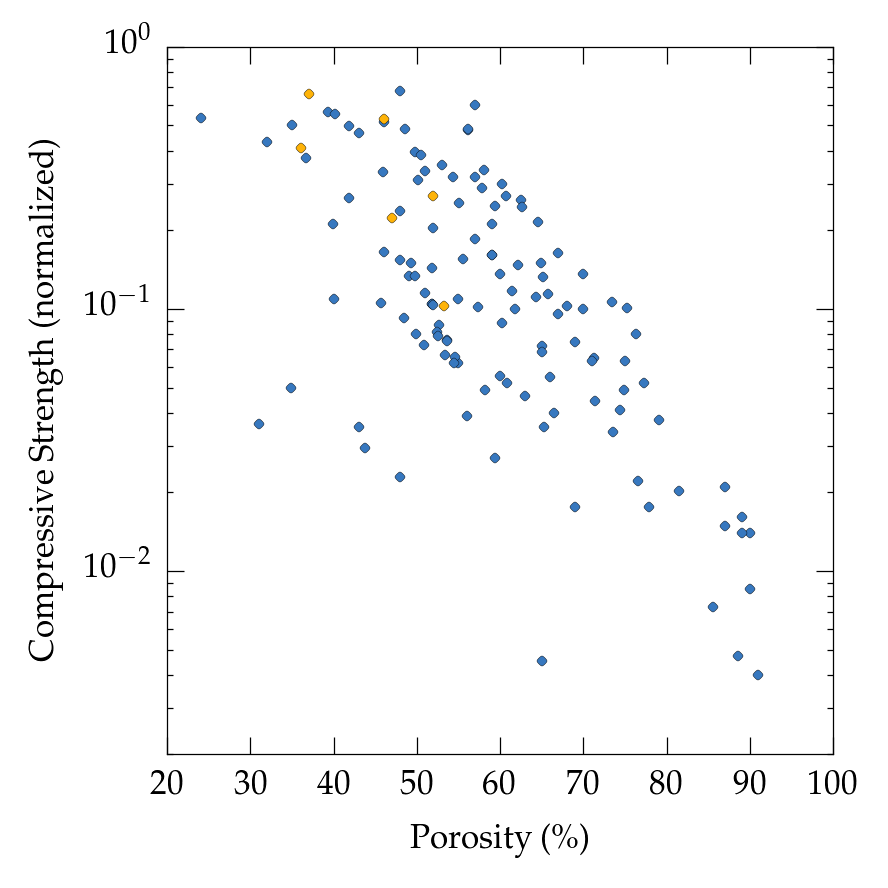

In [139]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(cellular['Porosity'], cellular['Normalized strength (compression)'])
plt.plot(brittle['Porosity'], brittle['Normalized strength (compression)'])

ax.set_yscale('log')
ax.set_xlabel('Porosity (\%)')
ax.set_ylabel('Compressive Strength (normalized)')
plt.ylim(0.002, 1)
plt.xlim(20, 100)

plt.tight_layout()
fig.savefig('../figures/figure9.png')

In [140]:
# Extract the bib ref of the above plot
dataplot = cellular[(cellular['Normalized strength (compression)'] > 0)]
authors = dataplot['Mendeley key']

print "cellular:"
list_authors(authors)

dataplot = brittle[(brittle['Normalized strength (compression)'] > 0)]
authors = dataplot['Mendeley key']

print "brittle:"
list_authors(authors)

cellular:
22 papers
@Shen2014a; @Vijayan2014b; @Kumar2014a; @Kim2014; @Kim2014b; @Landi2013; @Hunger2012; @Hou2012; @Jung2013; @Yook2012; @Liu2010; @Ding2007; @Landi2008; @Chino2008; @Fu2008a; @Fu2008; @Deville2006; @Zuo2008; @Han2010a; @Fu2010; @Flauder2014a; @Ping2015
brittle:
3 papers
@Hou2012; @Liu2010; @Ping2015


# Compressive strength in presence and absence of ice-lenses type structural defects
Figure 11 of the paper

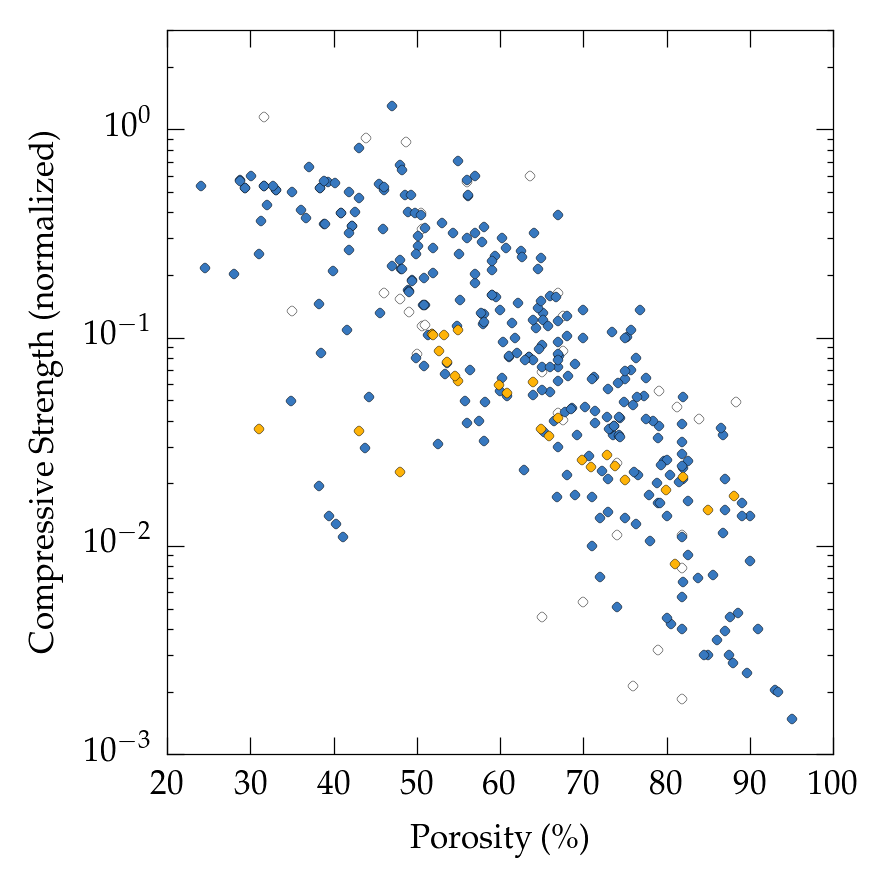

In [141]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(notsureifdefects['Porosity'], notsureifdefects['Normalized strength (compression)'], color='white')
plt.plot(nodefects['Porosity'], nodefects['Normalized strength (compression)'])
plt.plot(defects['Porosity'], defects['Normalized strength (compression)'])
ax.set_yscale('log')
ax.set_xlabel('Porosity (\%)')
ax.set_ylabel('Compressive Strength (normalized)')
plt.ylim(0.001, 3)
plt.xlim(20, 100)

plt.tight_layout()

fig.savefig('../figures/figure11.png')

In [142]:
# Extract the bib ref of the above plot
dataplot = defects[(defects['Normalized strength (compression)'] > 0)]
authors = dataplot['Mendeley key']
print "Defects: "
list_authors(authors)

dataplot = nodefects[(nodefects['Normalized strength (compression)'] > 0)]
authors = dataplot['Mendeley key']
print "No defects: "
list_authors(authors)

dataplot = notsureifdefects[(notsureifdefects['Normalized strength (compression)'] > 0)]
authors = dataplot['Mendeley key']
print "Not sure if defects: "
list_authors(authors)

Defects: 
5 papers
@Zhang2013a; @Zhao2010; @Landi2008; @Fu2008; @Ping2015
No defects: 
57 papers
@Shen2014a; @Yang2014; @Vijayan2014b; @Xing2014; @Lee2010b; @Flauder2014; @Kumar2014a; @Tang2014a; @Zeng2014a; @Kim2014; @Kim2014b; @Ai; @Farhangdoust2012a; @MohammadHosseinGhzanfari2013; @Xing2013; @Landi2013; @Zhang2013a; @Choi2012b; @Hunger2013; @Zamanian2012; @Farhangdoust2012; @Hou2012; @Jung2013; @Du2012a; @Zhang2011a; @Yook2012; @Choi2012; @Liu; @Li2011d; @Kim2011a; @Liu2010; @Ding2007; @Landi2008; @Chino2008; @Deville2006; @Cao2009; @Zuo2008; @Zhang2010; @Yoon2008a; @Yoon2007a; @Yoon2007b; @Yook2009; @Yook2009a; @Yang2010a; @Suetsugu2007; @Soon2009; @Macchetta2009; @Ji2010; @Hong2010a; @Hong2009; @Han2010a; @Fukushima2008; @Fukushima2010; @Fu2010; @Deville2006b; @Flauder2014a; @Zeng2014b
Not sure if defects: 
8 papers
@CHENG2014a; @Xu2014; @Liu2013a; @Flauder2012; @Landi2008; @Fu2008a; @Fu2008; @Liu2010a


# Influence of the starting particle size over the compressive strength
Figure 12 of the paper

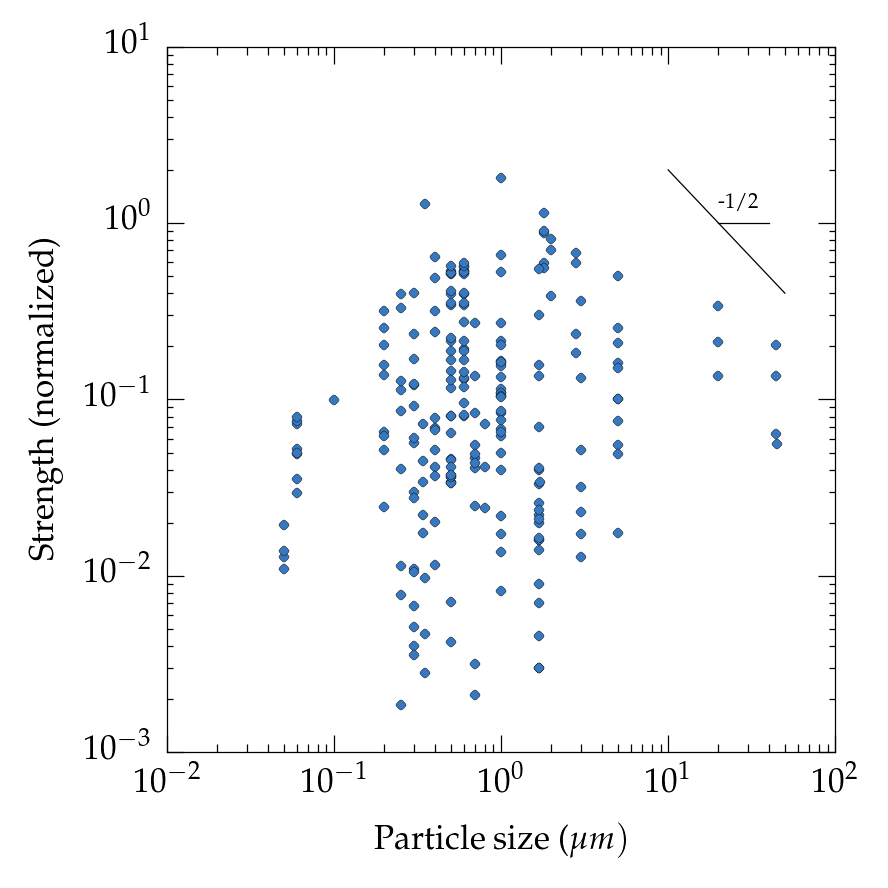

In [143]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(data['Granulo poudre'], data['Normalized strength (compression)'])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Particle size (\mu m)')
ax.set_ylabel('Strength (normalized)')
plt.ylim(0.001, 10)
plt.tight_layout()

# line with -1/2 slope
poresize_table = linspace(10, 50.0, num=10000)
plt.plot(poresize_table, 20*poresize_table**(-1/2), marker='', linestyle='-', color='black', linewidth='0.3')
plt.plot([20, 40], [1, 1], 'k-', lw=0.3)
plt.annotate('-1/2', (20, 1.2), fontsize='5')

fig.savefig('../figures/figure12.png')

In [144]:
# Extract the bibliographic references used for the plot
dataplot = data[(data['Granulo poudre'] > 0) & (data['Normalized strength (compression)']>0)]
authors = dataplot['Mendeley key']
list_authors(authors)

43 papers
@Shen2014a; @Yang2014; @Vijayan2014b; @Flauder2014; @Tang2014a; @CHENG2014a; @Zeng2014a; @Xu2014; @MohammadHosseinGhzanfari2013; @Liu2013a; @Landi2013; @Zhang2013a; @Choi2012b; @Flauder2012; @Farhangdoust2012; @Hou2012; @Jung2013; @Du2012a; @Zhang2011a; @Yook2012; @Choi2012; @Liu; @Li2011d; @Kim2011a; @Liu2010; @Chino2008; @Fu2008a; @Fu2008; @Zuo2008; @Zhang2010; @Yoon2008a; @Yoon2007a; @Suetsugu2007; @Macchetta2009; @Liu2010a; @Hong2010a; @Hong2009; @Han2010a; @Fukushima2008; @Fukushima2010; @Fu2010; @Zeng2014b; @Li2015b


# Influence of the nature of the solvent over the compressive strength.
Figure 13 of the paper

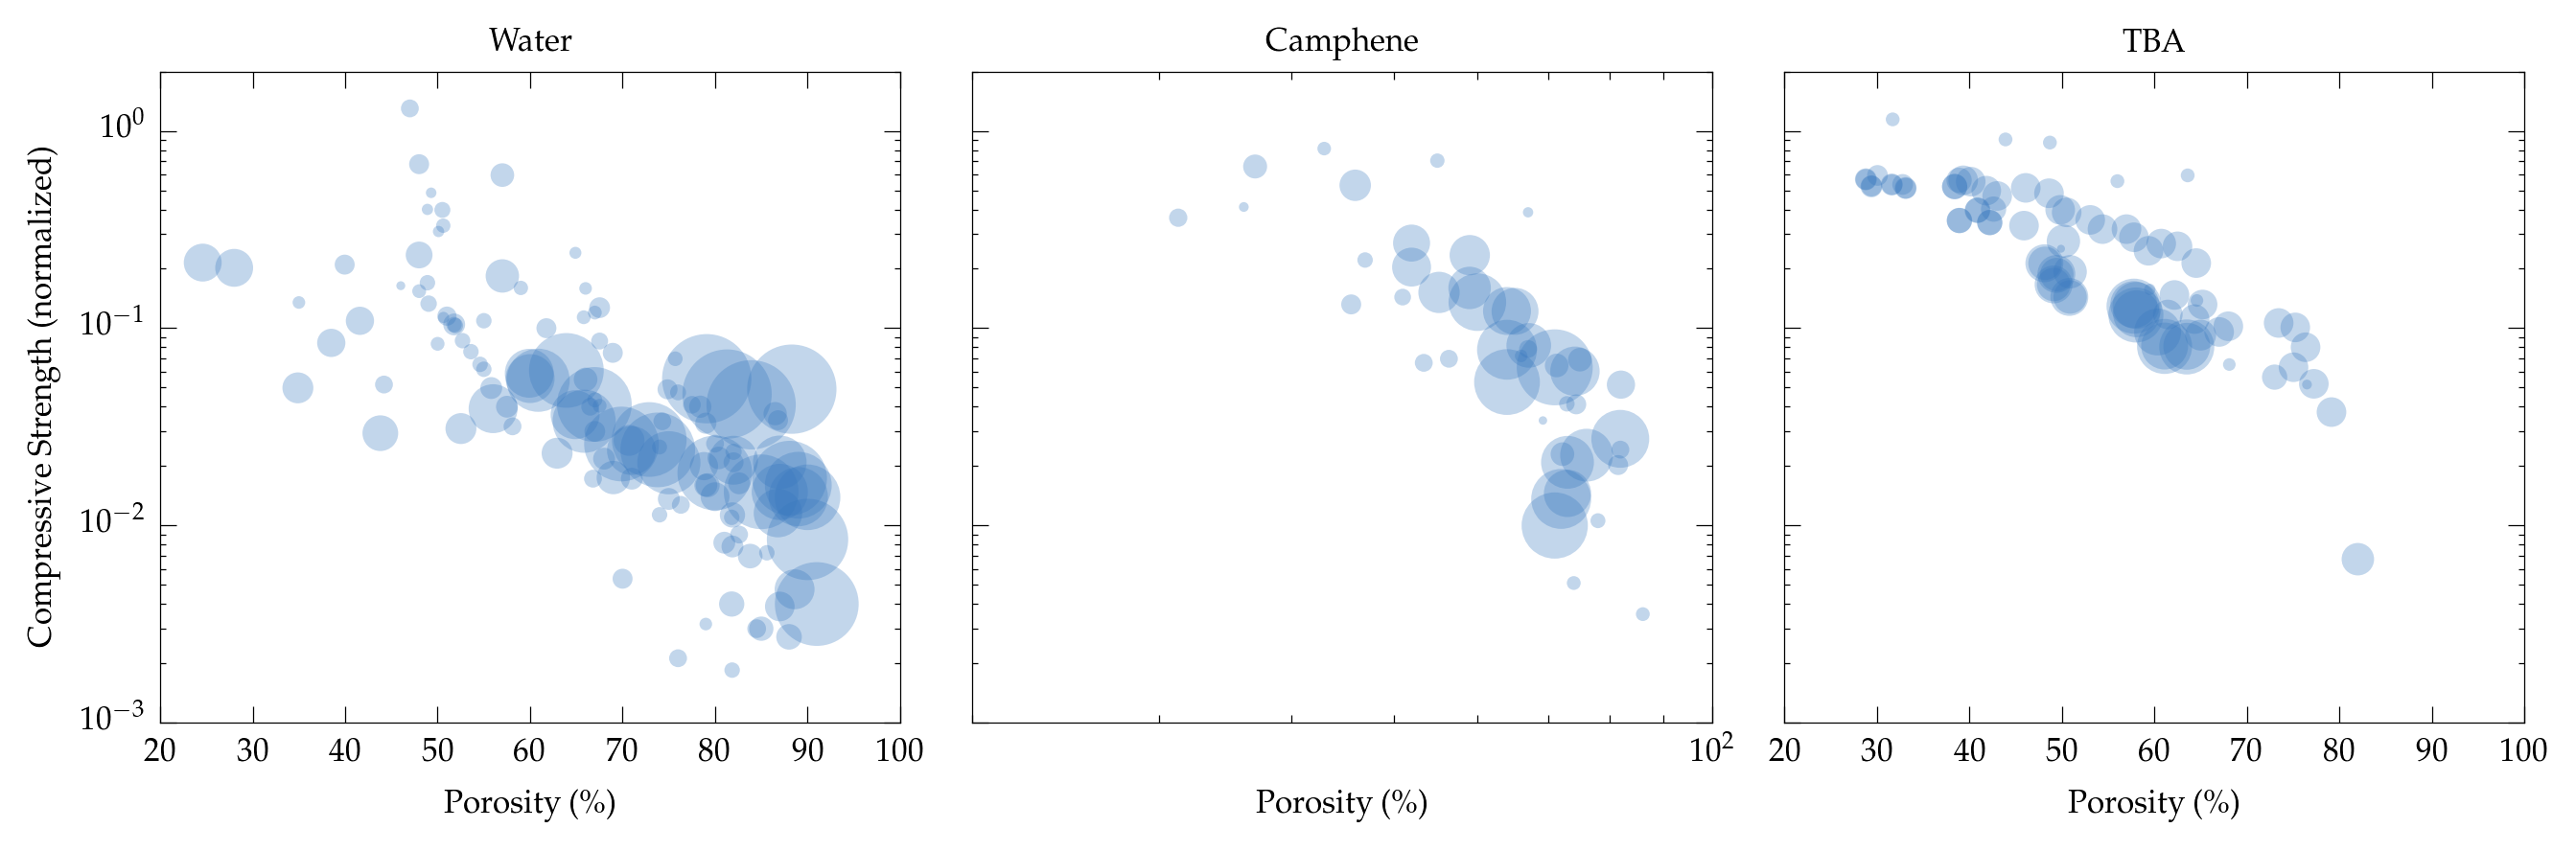

In [145]:
fig = plt.figure(figsize = (3*figuresize, figuresize))

ax = fig.add_subplot(1,3,1)
plt.scatter(water['Porosity'], water['Normalized strength (compression)'], s=water['Pore width'], lw=0, alpha=0.3, color='#3778bf')
ax.set_yscale('log')
ax.set_xlabel('Porosity (\%)')
ax.set_ylabel('Compressive Strength (normalized)')
plt.title('Water', fontsize=titlefontsize, weight=titleweight)
plt.ylim(0.001, 2)
plt.xlim(20, 100)

ax = fig.add_subplot(1,3,2)
plt.scatter(camphene['Porosity'], camphene['Normalized strength (compression)'], s=camphene['Pore width'], lw=0, alpha=0.3, color='#3778bf')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Porosity (\%)')
ax.set_yticklabels([])
plt.title('Camphene', fontsize=titlefontsize, weight=titleweight)
plt.ylim(0.001, 2)
plt.xlim(20, 100)

ax = fig.add_subplot(1,3,3)
plt.scatter(tba['Porosity'], tba['Normalized strength (compression)'], s=tba['Pore width'], lw=0, alpha=0.3, color='#3778bf')
ax.set_yscale('log')
ax.set_xlabel('Porosity (\%)')
ax.set_yticklabels([])
plt.title('TBA', fontsize=titlefontsize, weight=titleweight)
plt.ylim(0.001, 2)
plt.xlim(20, 100)

plt.tight_layout()

fig.savefig('../figures/figure13.png')

In [146]:
# Extract the bibliographic references used for the plot
dataplot = water[(water['Normalized strength (compression)']>0)]
authors = dataplot['Mendeley key']
print "water: "
list_authors(authors)

dataplot = camphene[(camphene['Normalized strength (compression)']>0)]
authors = dataplot['Mendeley key']
print "camphene: "
list_authors(authors)

dataplot = tba[(tba['Normalized strength (compression)']>0)]
authors = dataplot['Mendeley key']
print "tba: "
list_authors(authors)

water: 
36 papers
@Shen2014a; @Flauder2014; @Kumar2014a; @Tang2014a; @CHENG2014a; @Zeng2014a; @Ai; @Farhangdoust2012a; @MohammadHosseinGhzanfari2013; @Liu2013a; @Landi2013; @Zhang2013a; @Zamanian2012; @Flauder2012; @Hunger2012; @Farhangdoust2012; @Zhang2011a; @Liu; @Zhao2010; @Ding2007; @Landi2008; @Chino2008; @Fu2008a; @Fu2008; @Deville2006; @Cao2009; @Zuo2008; @Zhang2010; @Suetsugu2007; @Liu2010a; @Ji2010; @Fukushima2008; @Fukushima2010; @Fu2010; @Deville2006b; @Flauder2014a
camphene: 
19 papers
@Xing2014; @Lee2010b; @Xing2013; @Hou2012; @Jung2013; @Du2012a; @Yook2012; @Han; @Liu2010; @Yoon2008a; @Yoon2007a; @Yoon2007b; @Yook2009; @Yook2009a; @Soon2009; @Macchetta2009; @Hong2010a; @Hong2009; @Han2010a
tba: 
8 papers
@Xu2014; @Kim2014; @Kim2014b; @Choi2012b; @Choi2012; @Li2011d; @Kim2011a; @Yang2010a


# Compressive strength: measured (all materials) vs. predicted by Ashby honeycomb out-of-plane model
Figure 16 of the paper

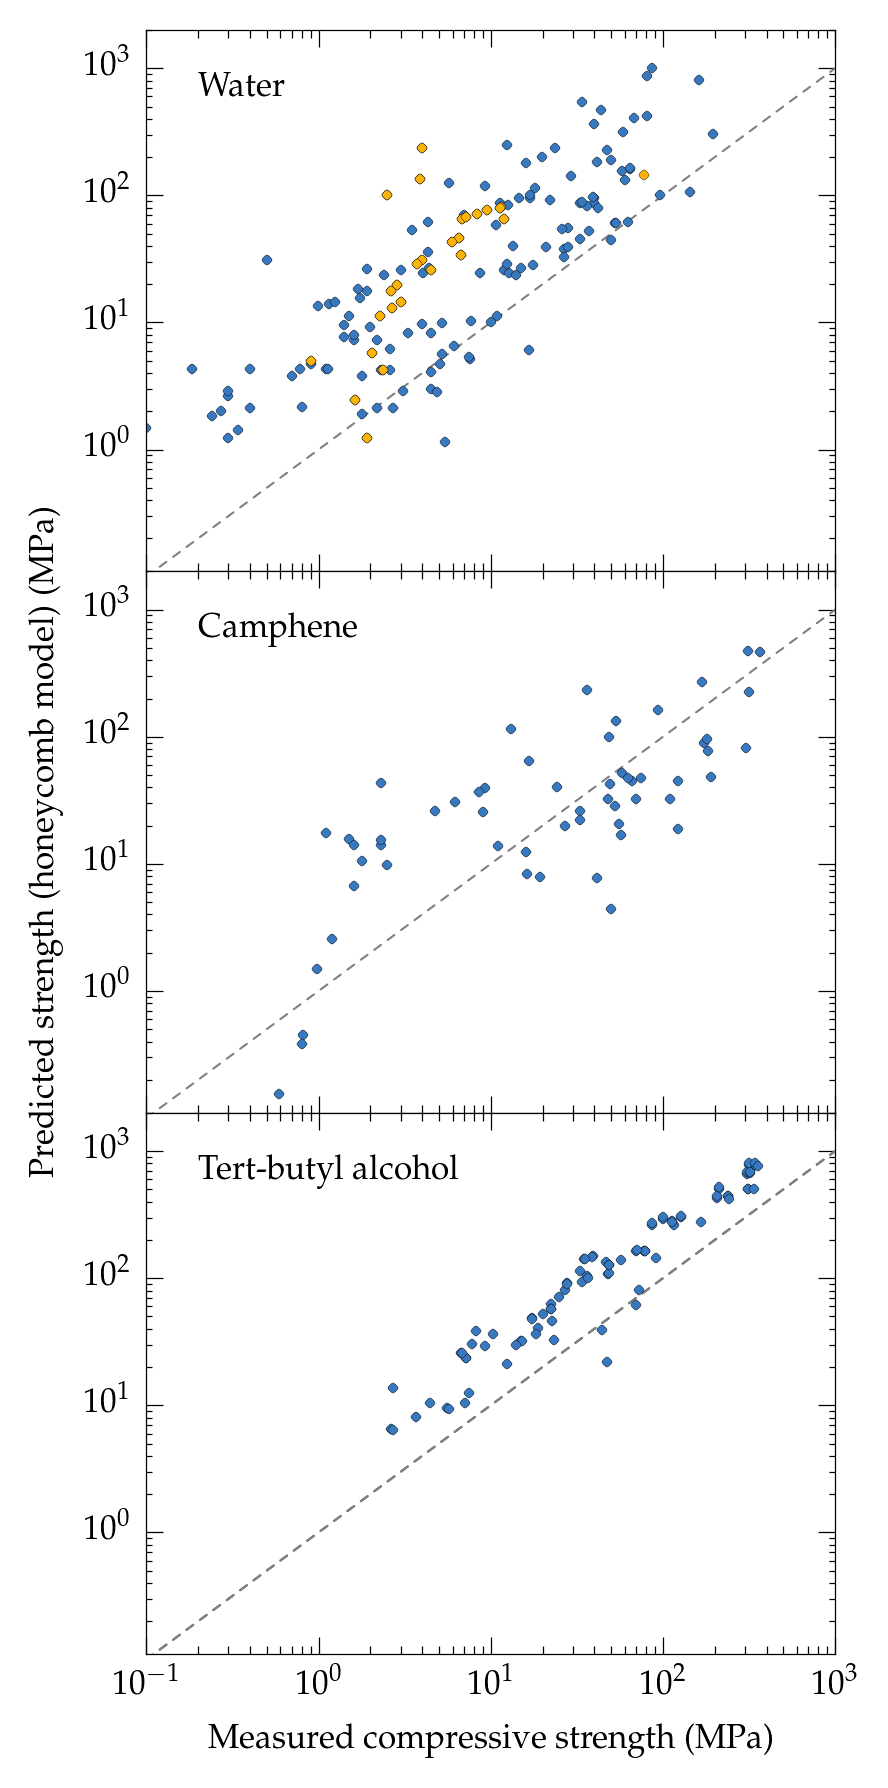

In [147]:
# Multipannels figure

# value for the 1:1 line on the plots
strength_table = linspace(0.1, 1000.0, num=10000)
        
def plot_upper_limit_honeycomb():
    plt.plot(strength_table, strength_table, linestyle='--', linewidth='0.5', marker='', dashes=[2, 2], color='0.5', zorder=1, dash_capstyle='round', markevery='2')    

f,  (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(figuresize, 2*figuresize))
plt.ylim(0.11, 2000)

ax1.plot(water['Strength (MPa)'], water['Honeycomb_Ashby'])
ax1.plot(defects['Strength (MPa)'], defects['Honeycomb_Ashby'])
ax1.plot(strength_table, strength_table, linestyle='--', linewidth='0.5', marker='', dashes=[2, 2], color='0.5', zorder=1, dash_capstyle='round', markevery='2')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel(' ')
closed_text = ax1.annotate("Water", xy=(0.2,600), fontsize=titlefontsize, color='k')

ax2.plot(camphene['Strength (MPa)'], camphene['Honeycomb_Ashby'])
ax2.plot(strength_table, strength_table, linestyle='--', linewidth='0.5', marker='', dashes=[2, 2], color='0.5', zorder=1, dash_capstyle='round', markevery='2')
plot_upper_limit_honeycomb()
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylabel('Predicted strength (honeycomb model) (MPa)')
closed_text = ax2.annotate("Camphene", xy=(0.2,600), fontsize=titlefontsize, color='k')

ax3.plot(tba['Strength (MPa)'], tba['Honeycomb_Ashby'])
ax3.plot(strength_table, strength_table, linestyle='--', linewidth='0.5', marker='', dashes=[2, 2], color='0.5', zorder=1, dash_capstyle='round', markevery='2')
plot_upper_limit_honeycomb()
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylabel(' ')
ax3.set_xlabel('Measured compressive strength (MPa)')
closed_text = ax3.annotate("Tert-butyl alcohol", xy=(0.2,600), fontsize=titlefontsize, color='k')

plt.tight_layout()
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

f.savefig('../figures/figure16.png')

In [148]:
# Extract the bib ref of the above plot
data_water = water[(water['Strength (MPa)'] > 0) & (water['Honeycomb_Ashby'] > 0)]
data_camphene = camphene[(camphene['Strength (MPa)'] > 0) & (camphene['Honeycomb_Ashby'] > 0)]
data_tba = tba[(tba['Strength (MPa)'] > 0) & (tba['Honeycomb_Ashby'] > 0)]

authors = data_water['Mendeley key']
print 'Water: '
list_authors(authors)

authors = data_camphene['Mendeley key']
print 'Camphene: '
list_authors(authors)

authors = data_tba['Mendeley key']
print 'TBA: '
list_authors(authors)

Water: 
32 papers
@Shen2014a; @Flauder2014; @Tang2014a; @CHENG2014a; @Zeng2014a; @Ai; @Farhangdoust2012a; @MohammadHosseinGhzanfari2013; @Liu2013a; @Zhang2013a; @Zamanian2012; @Flauder2012; @Hunger2012; @Farhangdoust2012; @Zhang2011a; @Liu; @Zhao2010; @Landi2008; @Chino2008; @Fu2008a; @Fu2008; @Deville2006; @Cao2009; @Zuo2008; @Zhang2010; @Suetsugu2007; @Liu2010a; @Ji2010; @Fukushima2010; @Fu2010; @Deville2006b; @Flauder2014a
Camphene: 
18 papers
@Xing2014; @Xing2013; @Hou2012; @Jung2013; @Du2012a; @Yook2012; @Han; @Liu2010; @Yoon2008a; @Yoon2007a; @Yoon2007b; @Yook2009; @Yook2009a; @Soon2009; @Macchetta2009; @Hong2010a; @Hong2009; @Han2010a
TBA: 
8 papers
@Xu2014; @Kim2014; @Kim2014b; @Choi2012b; @Choi2012; @Li2011d; @Kim2011a; @Yang2010a


In [149]:
#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
# you need to run the line above only once
%load_ext version_information
%reload_ext version_information

%version_information numpy, scipy, matplotlib

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.9 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.0.0
OS Darwin 14.3.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
Tue May 12 13:29:30 2015 CEST

# Acknowledgements
The research leading to these results has received funding from the European Research Council under the European Community's Seventh Framework Programme (FP7/2007-2013) Grant Agreement no. 278004 (project FreeCo)